In [11]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
def create_plant_metadata(root:str):
    dir_list = os.listdir(root)
    
    df_list = [create_df_from_dir(root, dir) for dir in dir_list]
    
    df = pd.concat(df_list, ignore_index=True)
    
    return df


def create_df_from_dir(root, dir):
    photo_names = os.listdir(os.path.join(root, dir))
    path = [os.path.join(root, dir, photo_name) for photo_name in photo_names]
    
    splitted_directory = dir.split('_')
    
    specie = splitted_directory[-1].lower()
    label = 1 if splitted_directory[0].lower() == 'diseased' else 0
    
    species = [specie] * len(photo_names)
    labels = [label] * len(photo_names)
    
    df = pd.DataFrame(
        {
            "path" : path,
            'species' : species,
            'diseased' : labels
        }
    )
    
    return df

df = create_plant_metadata('data/manipulated')
df

,path,species,diseased
0,data/manipulated/Diseased_Apple/033b1492-d5cf-...,apple,1
1,data/manipulated/Diseased_Apple/5c9da5f6-93f9-...,apple,1
2,data/manipulated/Diseased_Apple/fc7d3fc0-1b3c-...,apple,1
3,data/manipulated/Diseased_Apple/402aad30-3914-...,apple,1
4,data/manipulated/Diseased_Apple/b0b2a38c-396d-...,apple,1
...,...,...,...
39995,data/manipulated/Diseased_Corn/RS_Rust 2573.JPG,corn,1
39996,data/manipulated/Diseased_Corn/201bc21a-5372-4...,corn,1
39997,data/manipulated/Diseased_Corn/0118e276-ee7b-4...,corn,1
39998,data/manipulated/Diseased_Corn/RS_Rust 2242.JPG,corn,1


In [3]:
print('The classes: \n', np.unique(df['species']))

The classes: 
 ['apple' 'cherry' 'corn' 'grape' 'peach' 'pepper' 'potato' 'strawberry'
 'tomato']


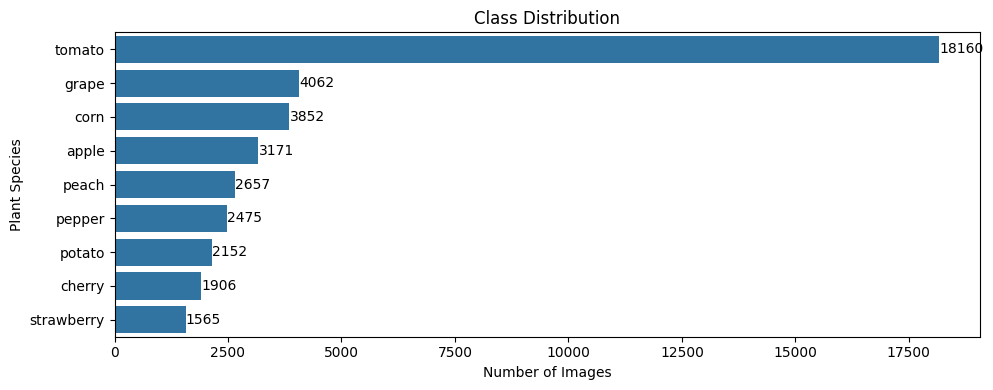

In [4]:
# visualize nr of images per specie

class_counts = df['species'].value_counts()

plt.figure(figsize=(10,4))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Species')
plt.tight_layout()

for i, v in enumerate(class_counts.values):
    ax.text(v+5, i, str(v), color='black', va='center')
    
plt.show()

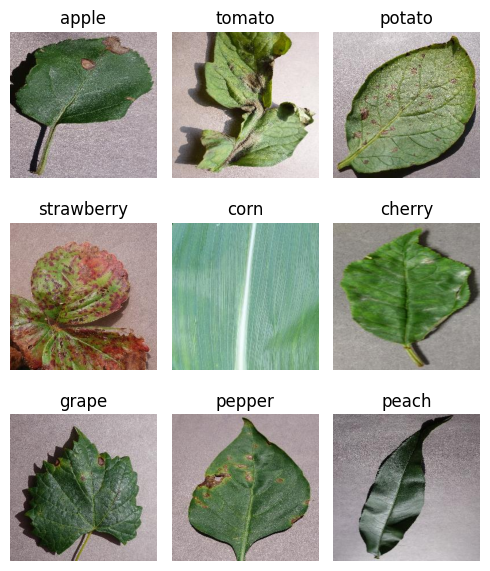

In [10]:
# Display sample images from each class
num_classes = len(df['species'].unique())
num_images_per_row = 3
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(5, 2 * num_rows))  

for i, plant_class in enumerate(df['species'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)
    
    # Inside the loop for displaying sample images
    image_path = os.path.join(df[df['species'] == plant_class]['path'].iloc[0])

    # Check if the image exists and can be loaded
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {image_path}")
    else:
        print(f"Error: Image path does not exist: {image_path}")

plt.tight_layout()
plt.show()